# Introduction to statistical learning

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
%matplotlib inline
sns.set()

In [2]:
# import data sets
df_credit = pd.read_csv('./data/Credit.csv' )
df_advertising = pd.read_csv('./data/Advertising.csv')
df_hearts = pd.read_csv('./data/Heart.csv')
df_auto = pd.read_csv('./data/Auto.csv')
df_default = pd.read_csv('./data/Default.csv')
df_wage = pd.read_csv('./data/Wage.csv')
iris = load_iris()
df_iris = pd.DataFrame(np.concatenate([iris.data, iris.target.reshape(-1,1)], axis=1) ,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['target'] = boston.target



In [177]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [178]:
df_iris.feature_names

AttributeError: 'DataFrame' object has no attribute 'feature_names'

## 1. Regression

### Linear Regression

In [179]:
df_credit

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


R2 score: 0.9569783815770265


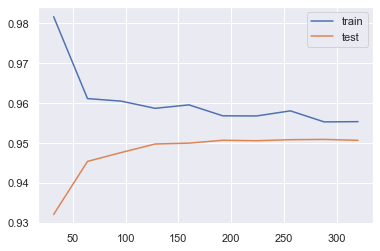

In [180]:
X = df_credit.iloc[:,1:-1]
y = df_credit.iloc[:, -1]
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn. model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)
col_transformer = ColumnTransformer(
    [
        ("one_hot", OneHotEncoder(drop='first'), ['Ethnicity', 'Gender', 'Student', 'Married' ]),
    ], remainder=StandardScaler()
)

pipeline = Pipeline([


        ('col_trans', col_transformer),
        ('lin_reg', RidgeCV(alphas=[0.01, 0.1, 1]))
]
)
pipeline.fit(X, y)

train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2')

plt.plot(train_sizes,np.mean( train_scores, axis=1), label='train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='test')
plt.legend()
score = pipeline.score(X_test, y_test)
print(f"R2 score: {score}")

### SVM

In [181]:
df_advertising

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [182]:
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [183]:
df_hearts

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


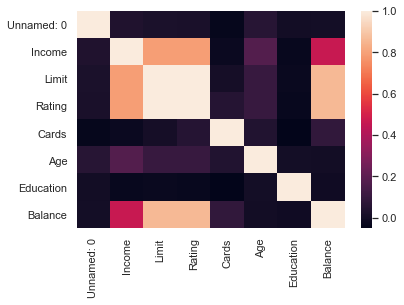

In [185]:
sns.heatmap(df_credit.corr())

In [186]:
X_vif = X.loc[:, X.dtypes != 'object']

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(X_vif.to_numpy(), 2)

1217.7598318721627

In [189]:
X_vif.to_numpy()

array([[1.48910e+01, 3.60600e+03, 2.83000e+02, 2.00000e+00, 3.40000e+01,
        1.10000e+01],
       [1.06025e+02, 6.64500e+03, 4.83000e+02, 3.00000e+00, 8.20000e+01,
        1.50000e+01],
       [1.04593e+02, 7.07500e+03, 5.14000e+02, 4.00000e+00, 7.10000e+01,
        1.10000e+01],
       ...,
       [5.78720e+01, 4.17100e+03, 3.21000e+02, 5.00000e+00, 6.70000e+01,
        1.20000e+01],
       [3.77280e+01, 2.52500e+03, 1.92000e+02, 1.00000e+00, 4.40000e+01,
        1.30000e+01],
       [1.87010e+01, 5.52400e+03, 4.15000e+02, 5.00000e+00, 6.40000e+01,
        7.00000e+00]])

## 2. Classification

In [190]:
df_default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [191]:
X = df_default.replace({'No':0, 'Yes':1})
X

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,1:], X.iloc[:, 0])
pipeline = Pipeline(
    [
        ('scale', StandardScaler()),
        ('log_reg', LogisticRegression())
    ]

)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9764

In [225]:
f_classif(X_train[['balance']],y_train)

(array([1067.7756199]), array([4.40854263e-219]))

In [224]:
from scipy.stats import f_oneway
f_oneway(X_train[y_train==1]['balance'], X_train[y_train==0]['balance'])

F_onewayResult(statistic=1067.7756199014768, pvalue=4.408542630652779e-219)

In [221]:
X_train[y_train==1]

,student,balance,income
2283,0,2023.733603,32094.627806
9510,1,1726.479610,13654.604938
4726,1,2109.999395,17774.525291
5014,0,1026.358855,56182.129930
3040,1,1500.894533,15802.232883
...,...,...,...
241,1,1572.856481,14930.178331
3379,0,1731.680766,56228.921682
6180,0,1408.438085,48012.913571
1018,0,1488.779562,49803.293079


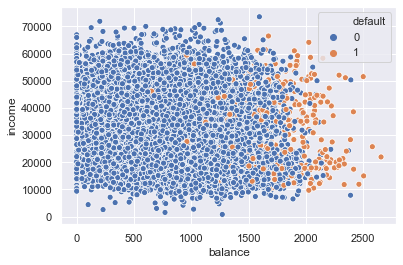

In [198]:
sns.scatterplot(data=X, y=X.income, x=X.balance, hue='default', markers='default')

In [53]:
df_credit.groupby('Ethnicity').Rating.mean()

Ethnicity
African American    365.070707
Asian               345.431373
Caucasian           354.773869
Name: Rating, dtype: float64

In [49]:
df_credit

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [84]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

model = ols('balance ~ default', data=df_default).fit()

In [85]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
default,2.867924e+08,1.0,1396.81632,2.774969e-286
Residual,2.052775e+09,9998.0,NaN,NaN


In [60]:
df_iris=pd.DataFrame(df_iris.data)

In [70]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


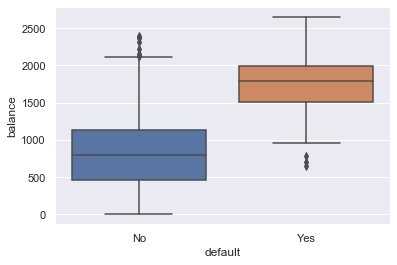

In [83]:
sns.boxplot(data=df_default, y='balance', x='default')

In [82]:
df_default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [96]:
df_wage

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,376816,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,302281,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,10033,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,14375,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


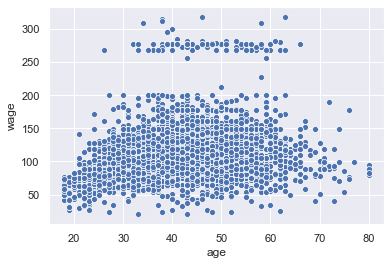

In [97]:
sns.scatterplot(data=df_wage, x='age', y='wage')

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lin_model = LinearRegression()
lin_model.fit(PolynomialFeatures(3, include_bias=False).fit_transform(df_wage[['age']]), df_wage.wage)
lin_model.coef_

array([ 1.01899915e+01, -1.68028587e-01,  8.49452197e-04])

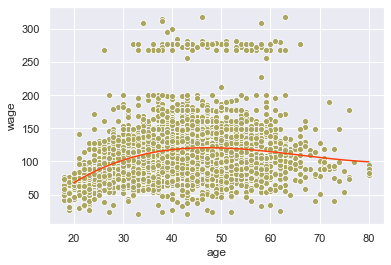

In [157]:
sns.scatterplot(data=df_wage, x='age', y='wage', color='xkcd:khaki')
x = np.linspace(20, 80, 50)
plt.plot(x,  np.fliplr(np.vander(x, N=4)[:, :-1]) @ lin_model.coef_ +  lin_model.intercept_, color='xkcd:orangered')

In [147]:
lin_model.coef_ * np.fliplr(np.vander(x, N=3)[:, :-1])

array([[ 105.8806007 ,  -21.20202743],
       [ 112.36308645,  -23.87766855],
       [ 118.84557221,  -26.71225864],
       [ 125.32805797,  -29.7057977 ],
       [ 131.81054372,  -32.85828575],
       [ 138.29302948,  -36.16972277],
       [ 144.77551524,  -39.64010877],
       [ 151.25800099,  -43.26944374],
       [ 157.74048675,  -47.05772769],
       [ 164.22297251,  -51.00496062],
       [ 170.70545826,  -55.11114253],
       [ 177.18794402,  -59.37627341],
       [ 183.67042978,  -63.80035327],
       [ 190.15291554,  -68.38338211],
       [ 196.63540129,  -73.12535993],
       [ 203.11788705,  -78.02628672],
       [ 209.60037281,  -83.08616248],
       [ 216.08285856,  -88.30498723],
       [ 222.56534432,  -93.68276095],
       [ 229.04783008,  -99.21948365],
       [ 235.53031583, -104.91515533],
       [ 242.01280159, -110.76977598],
       [ 248.49528735, -116.78334561],
       [ 254.9777731 , -122.95586422],
       [ 261.46025886, -129.2873318 ],
       [ 267.94274462, -1

In [146]:
np.vander(x, N=3)[:, :-1].shape

(50, 2)

In [173]:
np.vander([1, 2, 3])[:,1:3:-1]

array([], shape=(3, 0), dtype=int32)

In [8]:
df_hearts

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [24]:
df_hearts.pivot_table(columns=['ChestPain', 'Slope'], values='Age', index='Sex', aggfunc='sum', margins=True)

ChestPain asymptomatic                nonanginal                nontypical  \
Slope                1       2      3          1       2      3          1   
Sex                                                                          
0                615.0  1498.0  180.0     1171.0   707.0   46.0      628.0   
1               2039.0  3233.0  459.0     1357.0  1151.0  186.0     1196.0   
All             2654.0  4731.0  639.0     2528.0  1858.0  232.0     1824.0   

ChestPain               typical                  All  
Slope          2      3       1      2      3         
Sex                                                   
0          307.0    NaN   187.0    NaN   66.0   5405  
1          333.0  104.0   285.0  625.0  122.0  11090  
All        640.0  104.0   472.0  625.0  188.0  16495

In [31]:
df_hearts['ChestPain'].stack()

AttributeError: 'Series' object has no attribute 'stack'